# Clustering: k-Medoids

In this lab tasks we implement k-Medoids algorithm.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

We start with generating synthetic dataset consisting of four clusters.

In [3]:
N = 100

#Generate dataset
np.random.seed(844)
clust1 = np.random.normal(5, 2, (N,2))
clust2 = np.random.normal(15, 2, (N,2))
clust3 = np.random.multivariate_normal([17,3], [[1,0],[0,1]], N)
clust4 = np.random.multivariate_normal([2,16], [[1,0],[0,1]], N)
dataset = np.concatenate((clust1, clust2, clust3, clust4))

#Create an array that stores cluster IDs of every object in our dataset
#We will use the index of a medoid as a cluster ID
clusters = np.zeros((len(dataset),1))

In [4]:
def cluster_plots(dataset, medoidInd=[], colours = 'gray', title = 'Dataset'):
    fig,ax = plt.subplots()
    fig.set_size_inches(12, 12)
    ax.set_title(title,fontsize=14)
    ax.set_xlim(min(dataset[:,0]), max(dataset[:,0]))
    ax.set_ylim(min(dataset[:,1]), max(dataset[:,1]))
    ax.scatter(dataset[:, 0], dataset[:, 1],s=8,lw=1,c= colours)

    #Plot medoids if they are given
    if len(medoidInd) > 0:
        ax.scatter(dataset[medoidInd, 0], dataset[medoidInd, 1],s=8,lw=6,c='red')
    fig.tight_layout()
    plt.show()

Let's plot our dataset

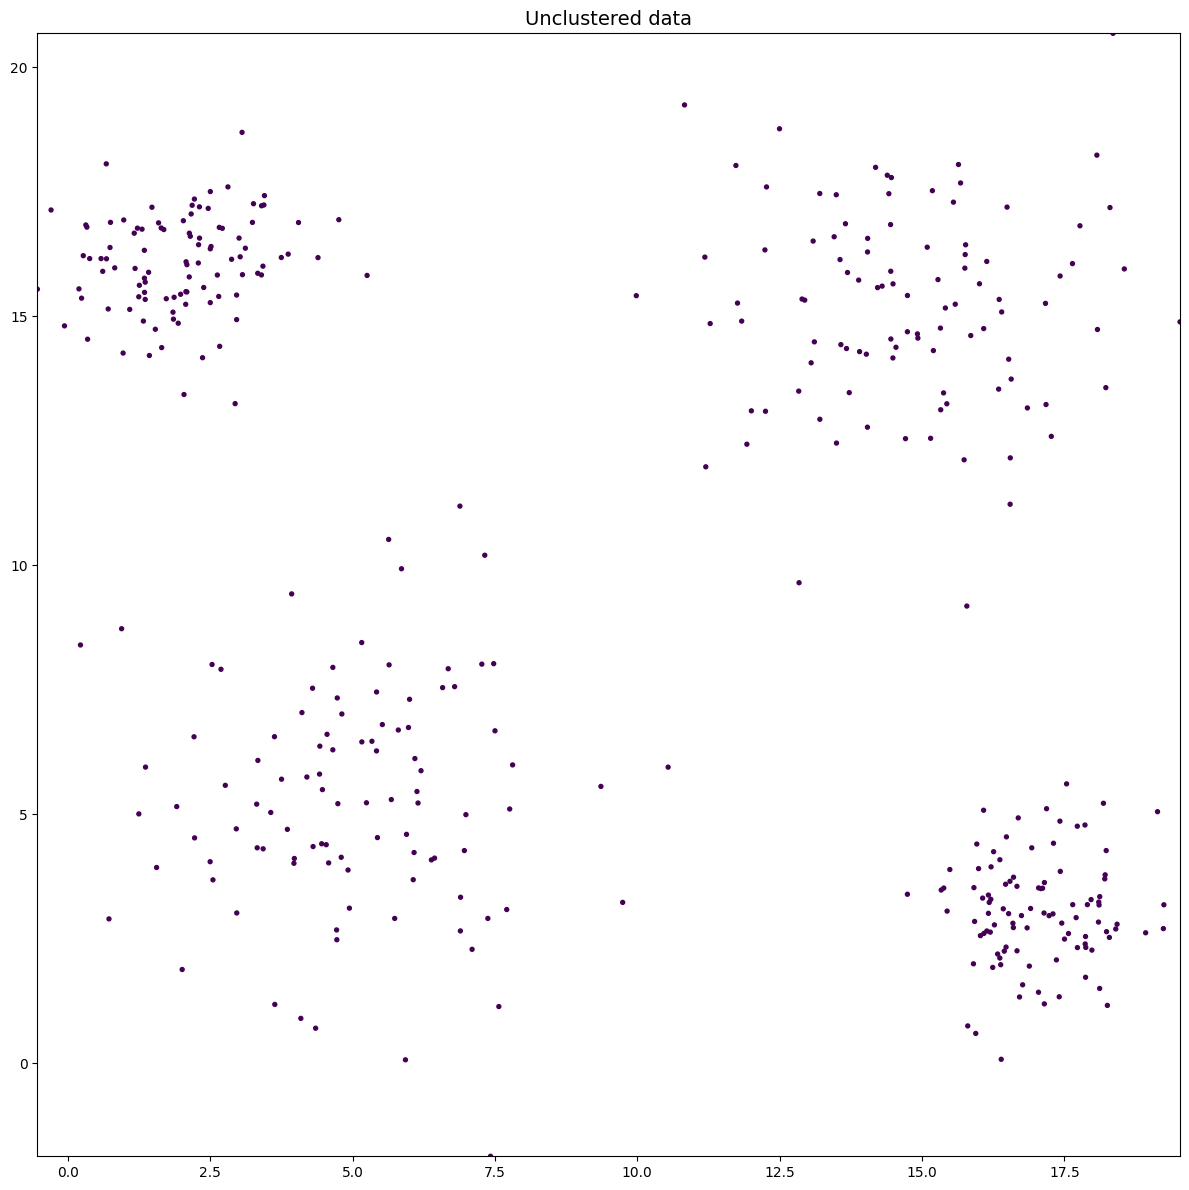

In [5]:
cluster_plots(dataset, colours=clusters, title='Unclustered data')

## Exercise 1

Implement k-medoids algorithm. Use the Euclidean distance as the dissimilarity measure.

In [23]:
def kmedoids(dataset, num_points, medoids, cluster_assignments, num_clusters):
    """
    Perform one iteration of the k-medoids clustering algorithm.

    Parameters:
    -----------
    dataset : np.ndarray
        A 2D NumPy array where each row represents a data point.
    num_points : int
        The number of data points in the dataset.
    medoids : np.ndarray
        An array containing the indices of the current medoid points.
    cluster_assignments : np.ndarray
        An array where each index stores the assigned cluster for the corresponding data point.
    num_clusters : int
        The number of clusters (k).

    Returns:
    --------
    min_total_distance : float
        The minimum total intra-cluster distance after updating medoids.
    medoids : np.ndarray
        The updated medoid indices after re-evaluation.
    """
    for i in range(num_points):
        distances = [np.linalg.norm(dataset[i] - dataset[medoid]) for medoid in medoids]
        cluster_assignments[i] = np.argmin(distances)

    for cluster_idx in range(num_clusters):
        cluster_points = dataset[cluster_assignments == cluster_idx]

        if len(cluster_points) > 0:
            min_total_distance = float('inf')
            new_medoid = medoids[cluster_idx]

            for j in range(len(cluster_points)):
                total_distance = sum(np.linalg.norm(cluster_points[j] - point) for point in cluster_points)

                if total_distance < min_total_distance:
                    min_total_distance = total_distance
                    new_medoid = np.where((dataset == cluster_points[j]).all(axis=1))[0][0]

            medoids[cluster_idx] = new_medoid

    return min_total_distance


## Exercise 2

1. Apply the implemented k-medoids algorithm to the generated dataset with the parameter k=4.
2. For every iteration of the algorithm  
    - output the current value of the objective function
    - output the indices of the current medoid objects
    - plot the clustering together with medoids

Iteration 1:
Objective function value: 34.844261755009796
Medoid indices: [191 340  37 310]


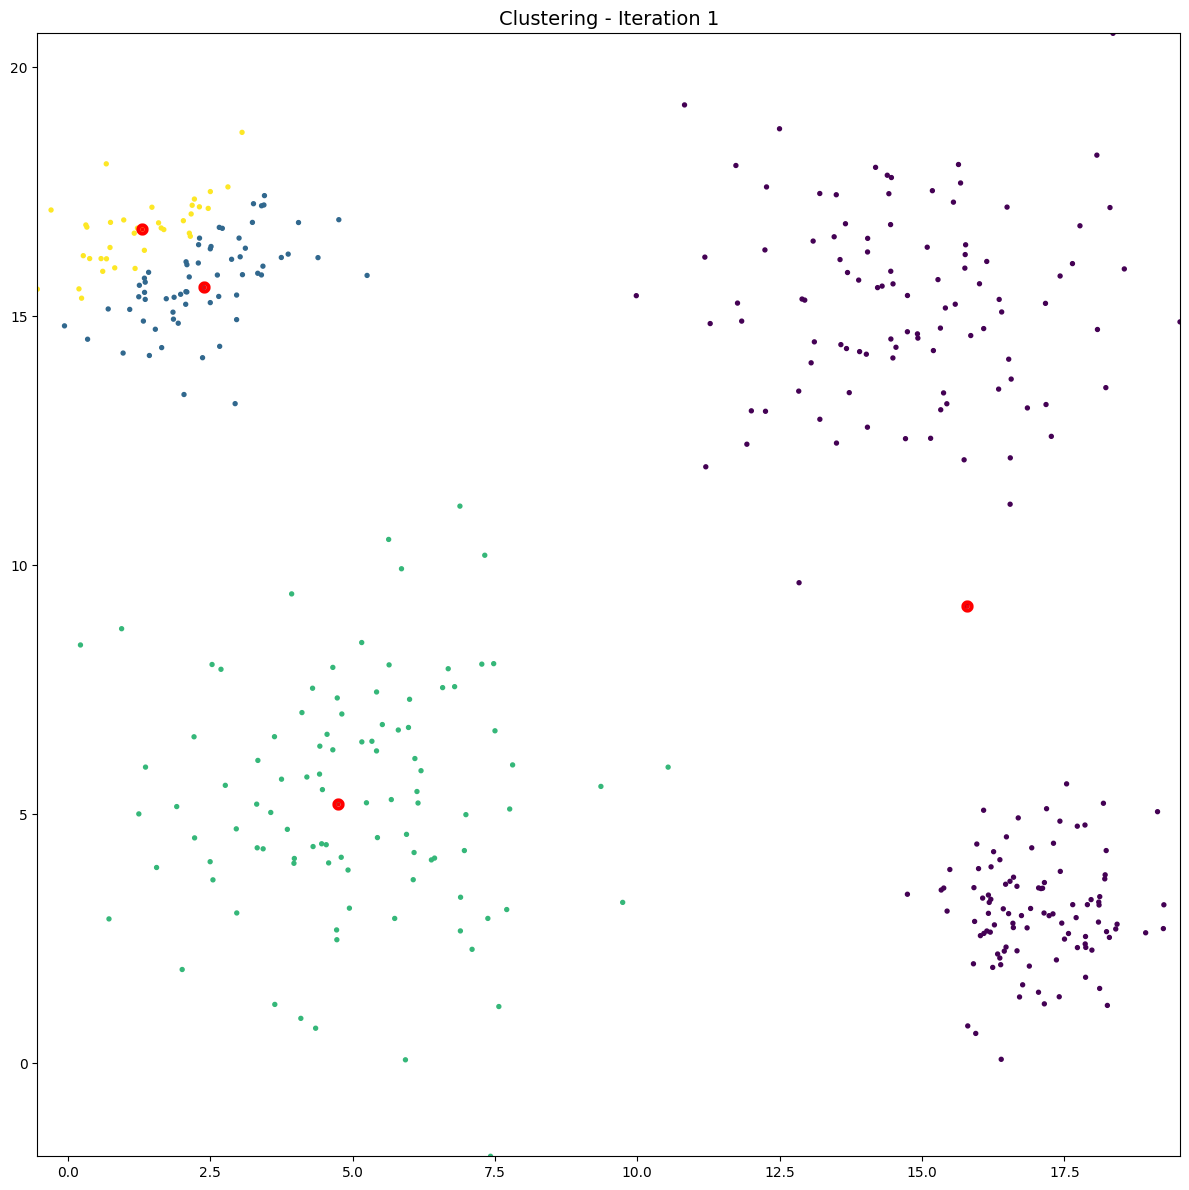

Iteration 2:
Objective function value: 41.59767797661888
Medoid indices: [204 338  37 367]


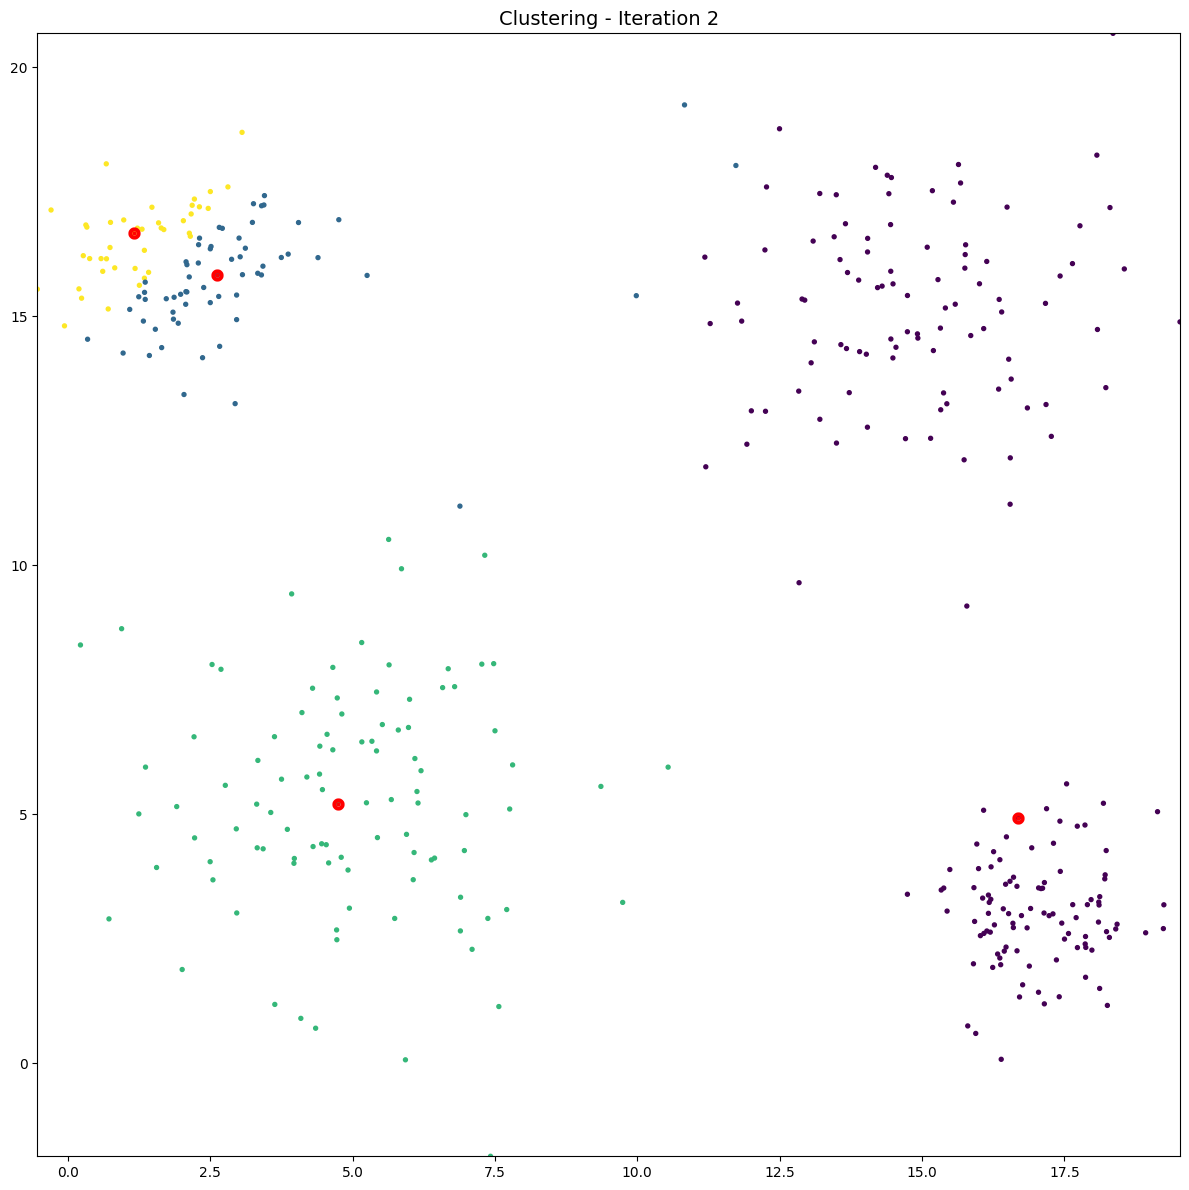

Iteration 3:
Objective function value: 45.313749847577085
Medoid indices: [270 378  37 389]


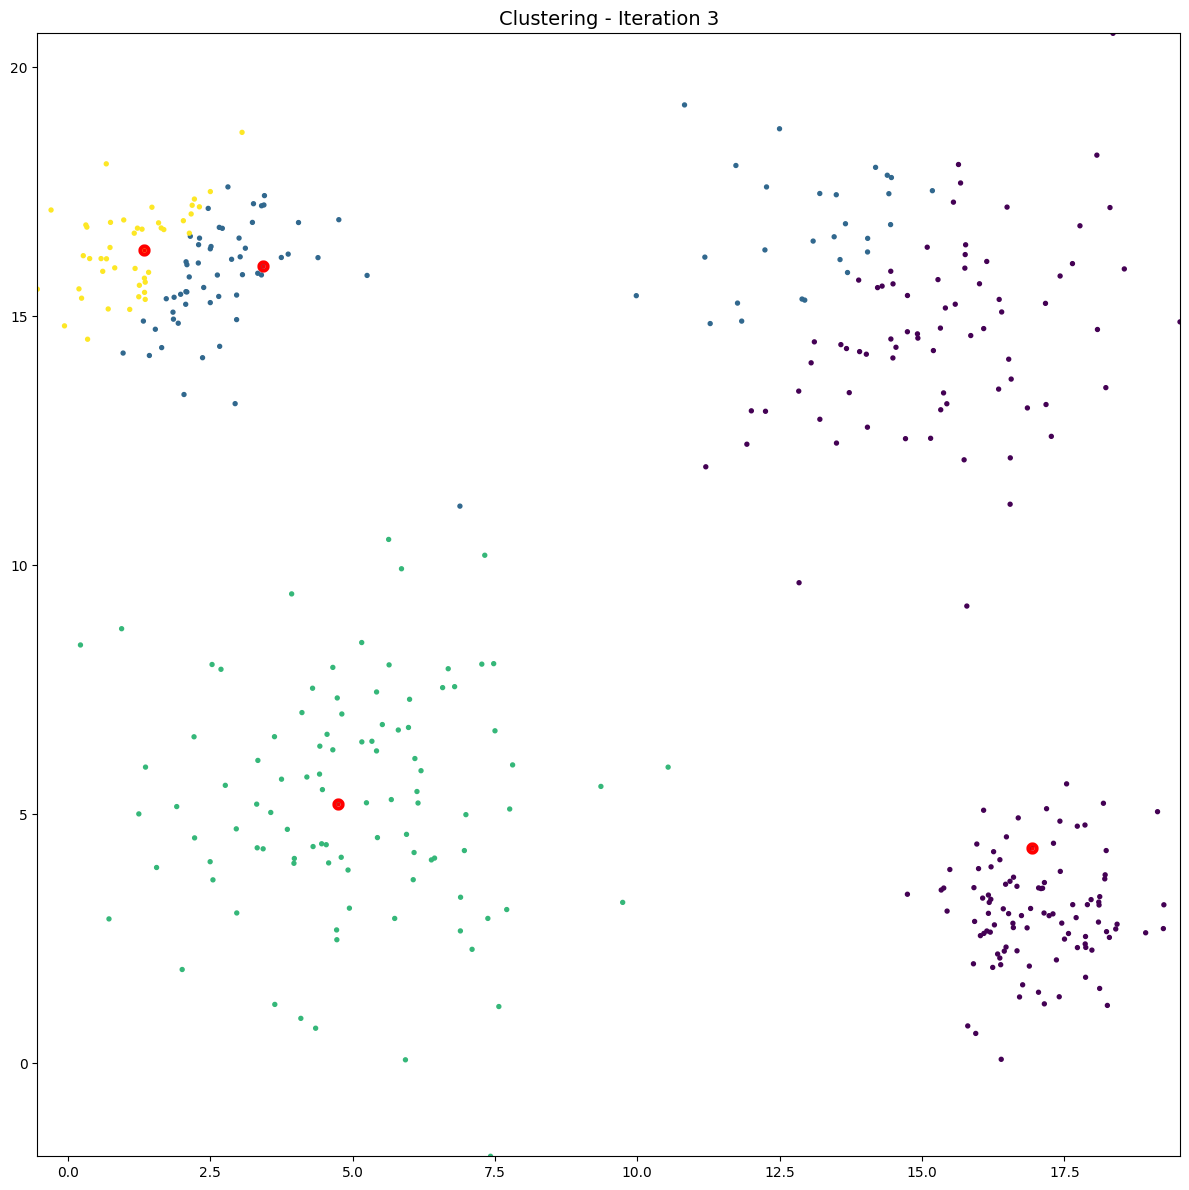

Iteration 4:
Objective function value: 68.14595434442379
Medoid indices: [270 199  37 304]


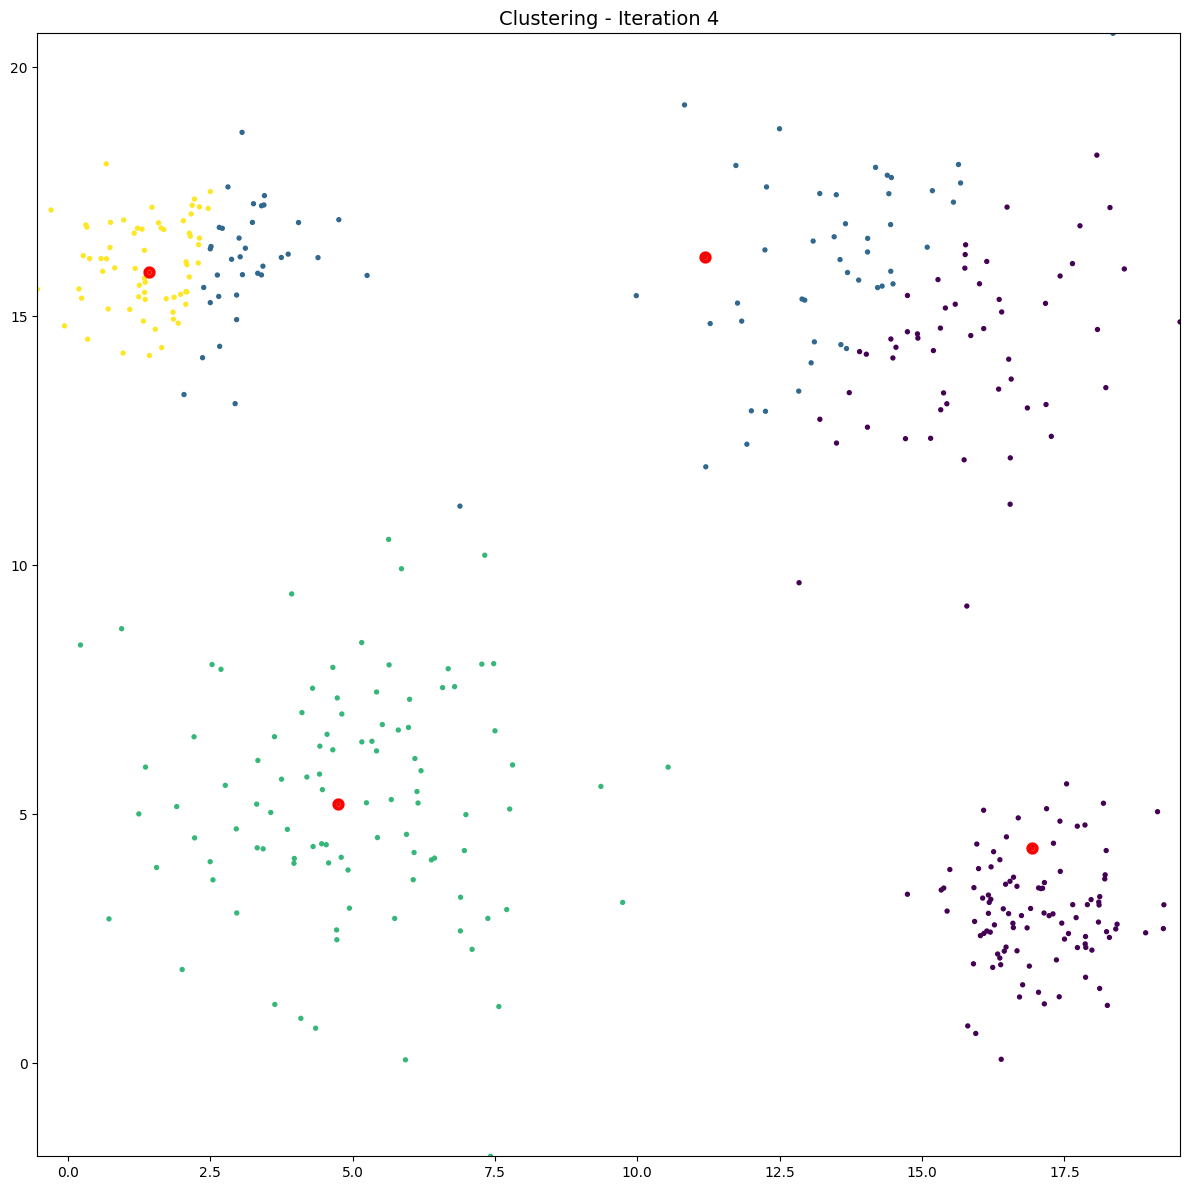

Iteration 5:
Objective function value: 132.3053182726437
Medoid indices: [290 138  37 381]


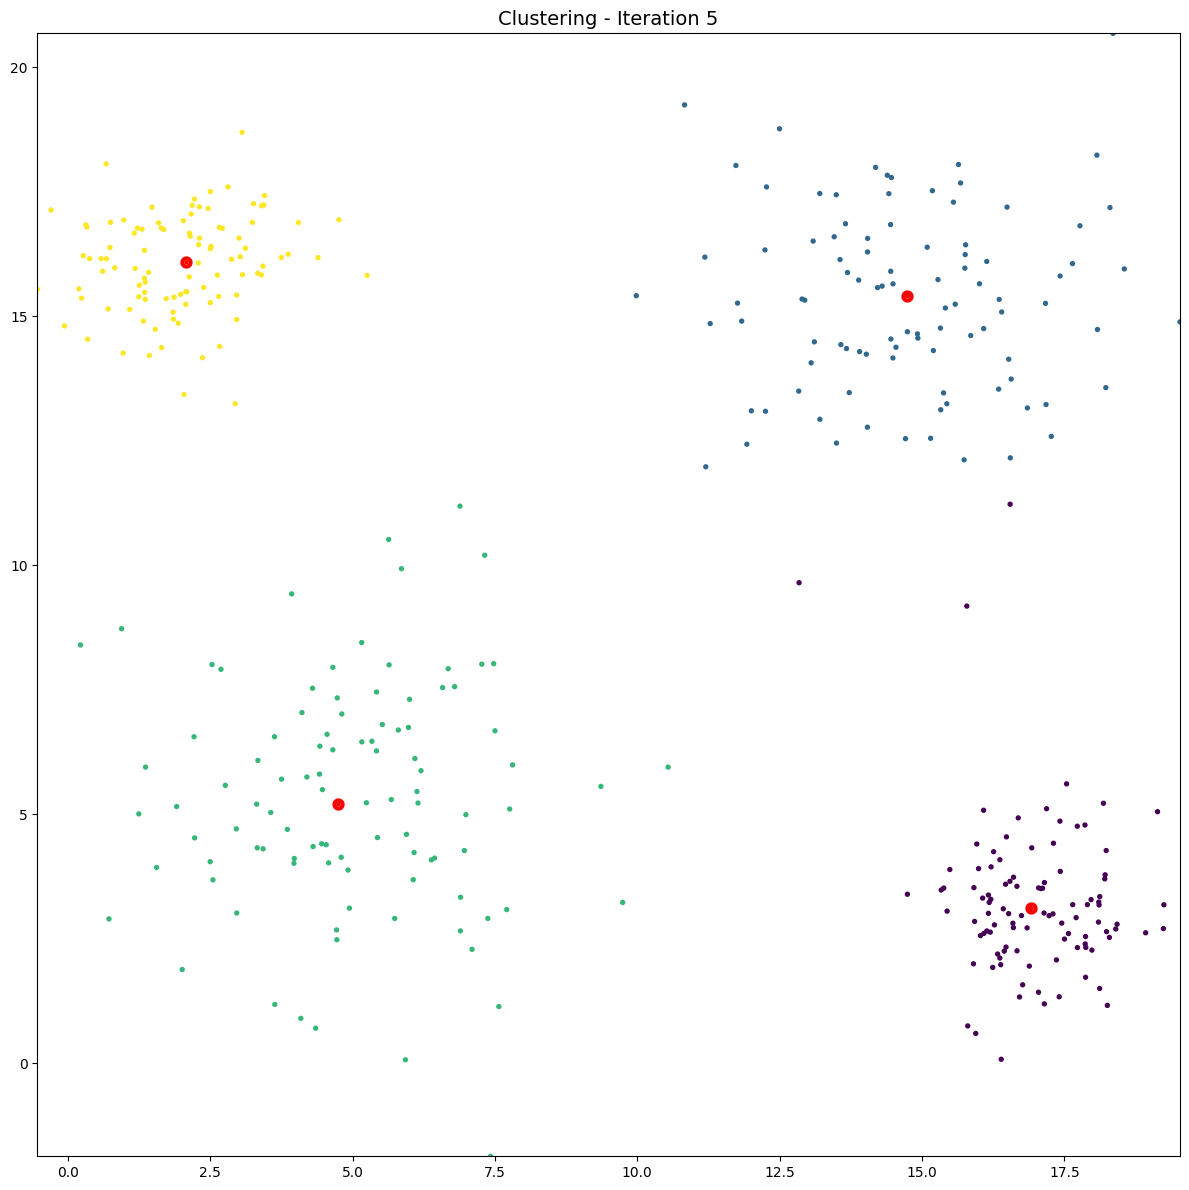

Converged, stopping iterations.


In [27]:
k = 4
max_iter = 100

n = dataset.shape[0]
medoids = np.random.choice(n, k, replace=False)
clusters = np.zeros(n, dtype=int)

for iteration in range(max_iter):
    medoids_current = medoids.copy()
    obj_fn = kmedoids(dataset, n, medoids_current, clusters, k)

    if np.array_equal(medoids, medoids_current):
        print("Converged, stopping iterations.")
        break

    medoids = medoids_current

    print(f"Iteration {iteration+1}:")
    print(f"Objective function value: {obj_fn}")
    print(f"Medoid indices: {medoids_current}")
    # Plot the clustering with medoids
    cluster_plots(dataset, medoids_current, colours=clusters, title=f"Clustering - Iteration {iteration+1}")